In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('worldwide_coffee_habits.csv')
df

,Country,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Type of Coffee Consumed,Population (millions)
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262
...,...,...,...,...,...,...
9995,Country_26,2013,6.107139,11.553694,Mocha,95.808370
9996,Country_22,2013,7.848531,14.844245,Americano,121.098306
9997,Country_31,2019,2.152059,5.516845,Americano,97.327529
9998,Country_43,2012,5.715941,4.641472,Cappuccino,33.916437


In [6]:
for col in df:
    df = df.rename({col: col.lower()}, axis=1)

In [7]:
changename = {
    'coffee consumption (kg per capita per year)': 'coffee consumption',
    'average coffee price (usd per kg)': 'average price',
    'type of coffee consumed': 'coffee type'
}
df = df.rename(changename, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                10000 non-null  object 
 1   year                   10000 non-null  int64  
 2   coffee consumption     10000 non-null  float64
 3   average price          10000 non-null  float64
 4   coffee type            10000 non-null  object 
 5   population (millions)  10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


In [9]:
df.nunique()

country                     50
year                        24
coffee consumption       10000
average price            10000
coffee type                  5
population (millions)    10000
dtype: int64

In [10]:
for col in df.select_dtypes(include=object):
    print({col: df[col].unique()})

{'country': array(['Country_39', 'Country_29', 'Country_15', 'Country_43',
       'Country_8', 'Country_21', 'Country_19', 'Country_23',
       'Country_11', 'Country_24', 'Country_36', 'Country_40',
       'Country_3', 'Country_22', 'Country_2', 'Country_44', 'Country_30',
       'Country_38', 'Country_33', 'Country_12', 'Country_25',
       'Country_49', 'Country_27', 'Country_42', 'Country_28',
       'Country_16', 'Country_47', 'Country_37', 'Country_7', 'Country_9',
       'Country_18', 'Country_4', 'Country_14', 'Country_50',
       'Country_26', 'Country_20', 'Country_35', 'Country_17',
       'Country_6', 'Country_34', 'Country_10', 'Country_31',
       'Country_48', 'Country_45', 'Country_41', 'Country_1', 'Country_5',
       'Country_13', 'Country_32', 'Country_46'], dtype=object)}
{'coffee type': array(['Americano', 'Mocha', 'Latte', 'Espresso', 'Cappuccino'],
      dtype=object)}


In [11]:
np.sort(df['year'].unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [12]:
df.isna().sum()

country                  0
year                     0
coffee consumption       0
average price            0
coffee type              0
population (millions)    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.duplicated().sum()

0

In [15]:
labels = [x for x in set(df['coffee type'])]
encode = {labels[i]: i for i in range(len(labels))}
decode = {i: labels[i] for i in range(len(labels))}

df['coffee type'] = df['coffee type'].apply(lambda x: encode[x])

In [16]:
df['coffee type'] = df['coffee type'].astype(np.int64)
df['year'] = df['year'].astype('object')

In [17]:
target = 'coffee type'
col = df.columns[df.columns != target]
col = np.append(col, target)

In [18]:
df_cleaned = df[col].select_dtypes(exclude=object)

<AxesSubplot: xlabel='coffee type', ylabel='count'>

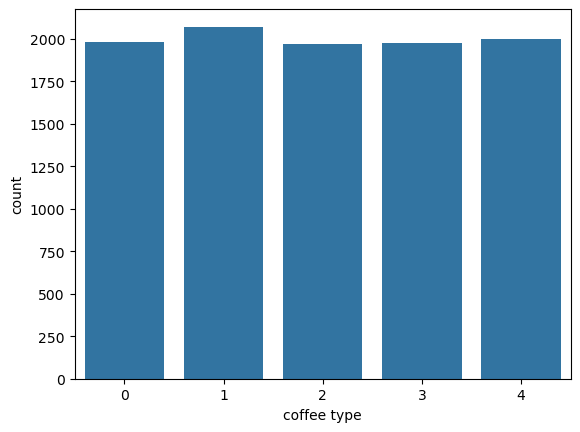

In [19]:
sns.countplot(df_cleaned, x='coffee type')

<AxesSubplot: >

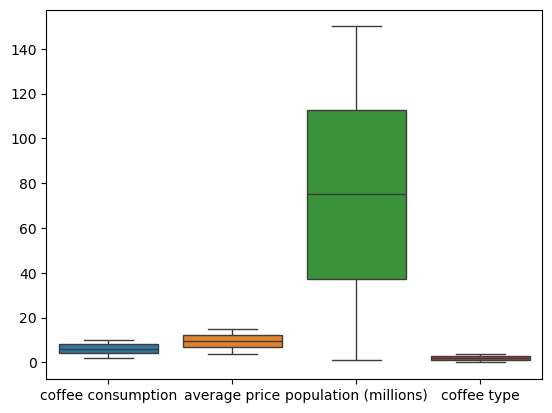

In [20]:
sns.boxplot(df_cleaned)

<AxesSubplot: ylabel='Count'>

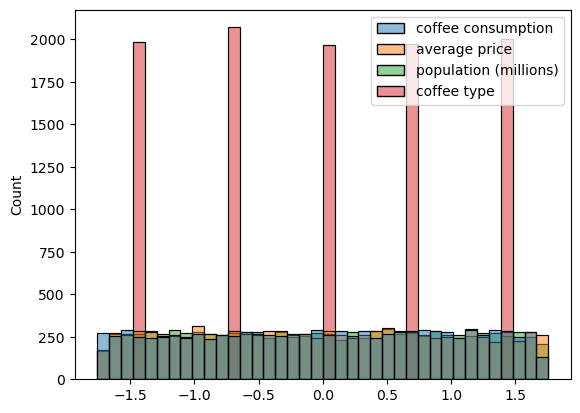

In [21]:
standarized = pd.DataFrame({})
for col in df_cleaned:
    standarized[col] = (df_cleaned[col] - np.mean(df_cleaned[col], axis=0)) / np.std(df_cleaned[col], axis=0)

sns.histplot(standarized)

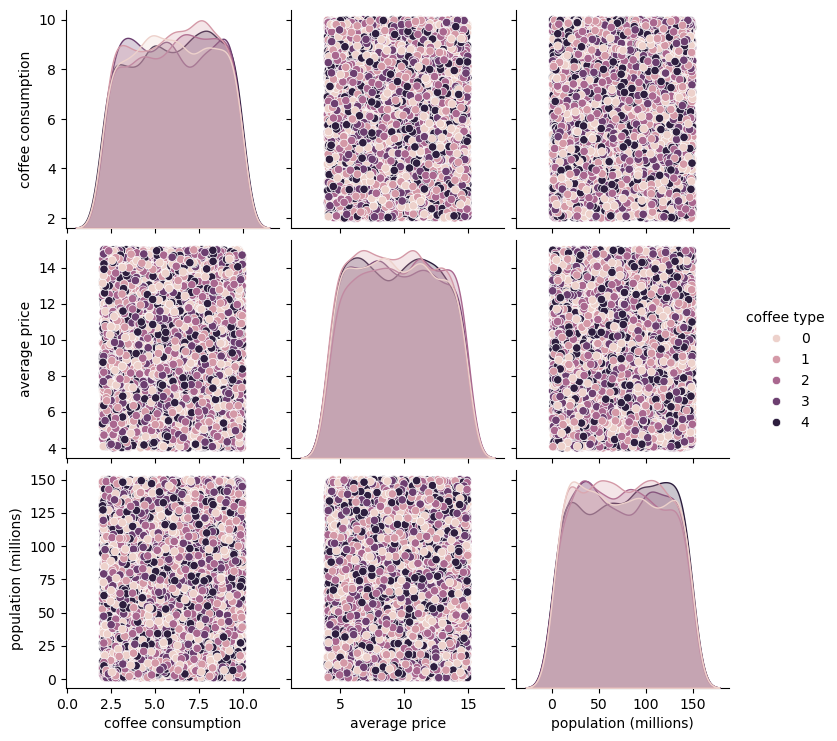

In [22]:
sns.pairplot(df_cleaned, hue='coffee type')

In [23]:
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

In [24]:
X

,coffee consumption,average price,population (millions)
0,9.253939,6.467453,65.929478
1,9.981203,4.346744,82.456680
2,3.312916,8.767496,110.938862
3,2.436180,11.748750,43.137207
4,4.637849,8.999099,65.484262
...,...,...,...
9995,6.107139,11.553694,95.808370
9996,7.848531,14.844245,121.098306
9997,2.152059,5.516845,97.327529
9998,5.715941,4.641472,33.916437


In [25]:
y

0       3
1       0
2       1
3       2
4       0
       ..
9995    0
9996    3
9997    3
9998    4
9999    3
Name: coffee type, Length: 10000, dtype: int64

In [26]:
def train_test_split(X, y, train_size=None, random_state=None,*,stratisfy=None):
    train = {'X': [], 'y': []}
    test = {'X': [], 'y': []}
    
    if stratisfy is None:
        n_sample = X.shape[0]
        np.random.seed(random_state)
        idx = np.random.permutation(n_sample)
        train_size = int(train_size * n_sample)
    
        train['X'], train['y'] = X.iloc[idx[:train_size]], y.iloc[idx[:train_size]]
        test['X'], test['y'] = X.iloc[idx[train_size:]], y.iloc[idx[train_size:]]
    else:
        for label in np.unique(stratisfy):
            i = y[y == label].index
            x_i = X.iloc[i]
            y_i = y.iloc[i]
            
            n_sample = x_i.shape[0]
            
            np.random.seed(42)
            idx = np.random.permutation(n_sample)
            train_i = int(train_size * n_sample)
            
            train['X'].append(x_i.iloc[idx[:train_i]])
            train['y'].append(y_i.iloc[idx[:train_i]])
            test['X'].append(x_i.iloc[idx[train_i:]])
            test['y'].append(y_i.iloc[idx[train_i:]])
        
        for x in train:
            train[x] = pd.concat(train[x])
            test[x] = pd.concat(test[x])
    
    return train['X'], test['X'], train['y'], test['y']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratisfy=y)

In [28]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4]), array([1587, 1656, 1575, 1580, 1600]))

In [29]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4]), array([397, 415, 394, 395, 401]))

In [30]:
class Node:
    def __init__(self, left=None, right=None, feature=None, threshold=None,*,leaf = None):
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.leaf = leaf
    
    def is_leaf_node(self):
        return self.leaf is not None

In [ ]:
class DecisionTree:
    def __init__(self, min_sample_split = 2, max_depth=100, random_state=None):
        self.min_sample_split = min_sample_split
        self.max_depth = max_depth
        self.random_state = random_state
        self.root = None
        
    def fit(self, X, y):
        self.root = self._create_tree(X, y)
    
    def _create_tree(self, X, y, depth=0):
        n_label = np.unique(y)
        n, m = X.shape
    
        if (depth > self.max_depth or
            self.min_sample_split <= n or
            n_label == 1):
            most_common = self._most_common_label(y)
            return Node(leaf=most_common)
        
        np.random.seed(self.random_state)
        feat_idxs = np.random.choice(m, m, replace=True)
        
        feature, threshold = self._best_split(X, y, feat_idxs)
        
    def _best_split(self, X, y, feat_idxs):
        best_ig = -1
        split_feat, split_thresh = None, None
        for feat_idx in feat_idxs:
            x_col = X.loc[:, feat_idx]
            thresholds = np.uniquq(x_col)
            for threshold in thresholds:
                ig = self._information_gain(x_col, y, threshold)
                if ig > best_ig:
                    best_ig = ig
                    split_feat = feat_idx
                    split_thresh = threshold
        
        return split_feat, split_thresh
    
    def _information_gain(self, X, y, threshold):
        parent_entorpy = self._entropy(y)
        right_idxs, left_idxs = self._split(X, threshold)
        
    def _split(self, X, threshold)

    def _entropy(self, y):
        label, count = np.unique(y, return_counts=True)
        prob = count / len(y)
        return -np.sum(p * np.log2(p) for p in prob)
        
    
    def predict(self, X):
        result = [self._tranverse_node(x, self.root) for x in X]
        return 